# Multi-Class Sentence Classification using CNN

Trained a **1-D Convolutional Neural Network** for the task of sequence classification on the dataset available here: https://github.com/AcademiaSinicaNLPLab/sentiment_dataset 

Used **TREC question dataset**, which involves classifying a question into 6 question types (whether the question is about person, location, numeric information, etc.)

In [217]:
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
corpus = pd.read_pickle('./sentiment_dataset/TREC.pkl')
sentences, labels = list(corpus.sentence), list(corpus.label)

In [361]:
#set params
vocab_dictionary = 1500
max_seq_len = 20
embedding_size = 300
batch_size = 64
epochs = 10
filter_size = 3
filters = 250
hidden_dims = 256

In [362]:
#preprocessing
token = Tokenizer(num_words=vocab_dictionary)
token.fit_on_texts(sentences)
x = token.texts_to_sequences(sentences)
x = sequence.pad_sequences(x, maxlen=max_seq_len)
y = to_categorical(labels)
print(x.shape)
print(y.shape)

(5952, 20)
(5952, 6)


In [363]:
#buiding model
model = Sequential()

model.add(Embedding(input_dim=vocab_dictionary,
                    output_dim=embedding_size,
                   input_length=max_seq_len))

model.add(Dropout(0.2))

model.add(Conv1D(filters=filters,
                kernel_size=filter_size,
                strides=1,
                padding='valid',
                activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(units=hidden_dims,
               activation='relu',
               kernel_regularizer=l2(0.2)))

model.add(Dropout(0.2))

model.add(Dense(units=6,
               activation='softmax'))

In [364]:
#compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 20, 300)           450000    
_________________________________________________________________
dropout_114 (Dropout)        (None, 20, 300)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 18, 250)           225250    
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 250)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               64256     
_________________________________________________________________
dropout_115 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 6)                 1542      
Total para

In [365]:
#model fitting
history = model.fit(x, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Train on 4761 samples, validate on 1191 samples
Epoch 1/10
4761/4761 [==============================] - 7s 1ms/step - loss: 21.5103 - acc: 0.4890 - val_loss: 5.0515 - val_acc: 0.6599
Epoch 2/10
4761/4761 [==============================] - 5s 1ms/step - loss: 2.1518 - acc: 0.7316 - val_loss: 0.9746 - val_acc: 0.7531
Epoch 3/10
4761/4761 [==============================] - 5s 1ms/step - loss: 0.6992 - acc: 0.8276 - val_loss: 0.6927 - val_acc: 0.7918
Epoch 4/10
4761/4761 [==============================] - 5s 1ms/step - loss: 0.4944 - acc: 0.8820 - val_loss: 0.6481 - val_acc: 0.8010
Epoch 5/10
4761/4761 [==============================] - 5s 1ms/step - loss: 0.4065 - acc: 0.9101 - val_loss: 0.6380 - val_acc: 0.8111
Epoch 6/10
4761/4761 [==============================] - 5s 1ms/step - loss: 0.3379 - acc: 0.9301 - val_loss: 0.6362 - val_acc: 0.8212
Epoch 7/10
4761/4761 [==============================] - 5s 1ms/step - loss: 0.3163 - acc: 0.9376 - val_loss: 0.6061 - val_acc: 0.8304
Epoch 8/10
47

Text(0.5,1,'Train vs Validation Loss')

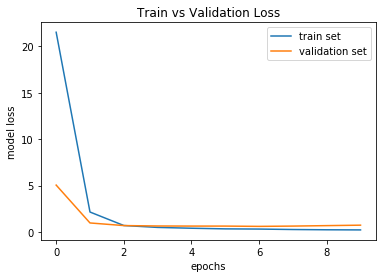

In [366]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('model loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Loss')

Text(0.5,1,'Train vs Validation Accuracy')

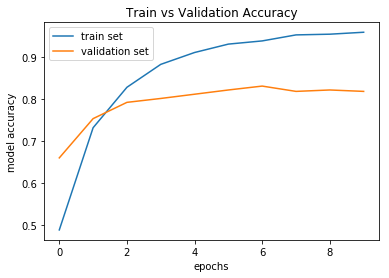

In [367]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('model accuracy')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Accuracy')